# Proyek Pertama: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Nida'an Khafiyya
- Email: nidaankhafiyyaakun@gmail.com
- Id Dicoding: needkh

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import f_oneway
from imblearn.over_sampling import RandomOverSampler

from google.colab import userdata
from sqlalchemy import create_engine

### Menyiapkan data yang akan diguankan

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv", delimiter=";")

df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [ ]:
# Menampilkan kolom yang ada pada dataset
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation/Preprocessing

### Missing Values dan Duplicate

In [ ]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [ ]:
# cek duplikasi data
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Label Decoding

In [ ]:
def label_decoding(df, feature):
    category_mappings = {
        'Marital_status': {
            1: 'Single',
            2: 'Married',
            3: 'Widower',
            4: 'Divorced',
            5: 'Facto Union',
            6: 'Legally Seperated'
        },
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Daytime_evening_attendance'  : {0: 'Evening', 1: 'Daytime'},
        'Gender'                      : {0: 'Female', 1: 'Male'},
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        '''
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)
        '''

    return df

In [ ]:
clean_df = df.copy()
clean_df =clean_df = label_decoding(clean_df, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

clean_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

### Pengecekan Variabel Target

In [ ]:
# Mengecek pembagian data target
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [ ]:
# Menggabungkan Enrolled dan Graduate menjadi Not Dropout
clean_df['Status_Binary'] = clean_df['Status'].replace({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 1  # Enrolled dan Graduate digabung sebagai "Not Dropout"
})

<ipython-input-14-2fc171559a58>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df['Status_Binary'] = clean_df['Status'].replace({


In [ ]:
dropout_counts = clean_df['Status_Binary'].value_counts()
dropout_counts

,count
Status_Binary,
1,3003
0,1421


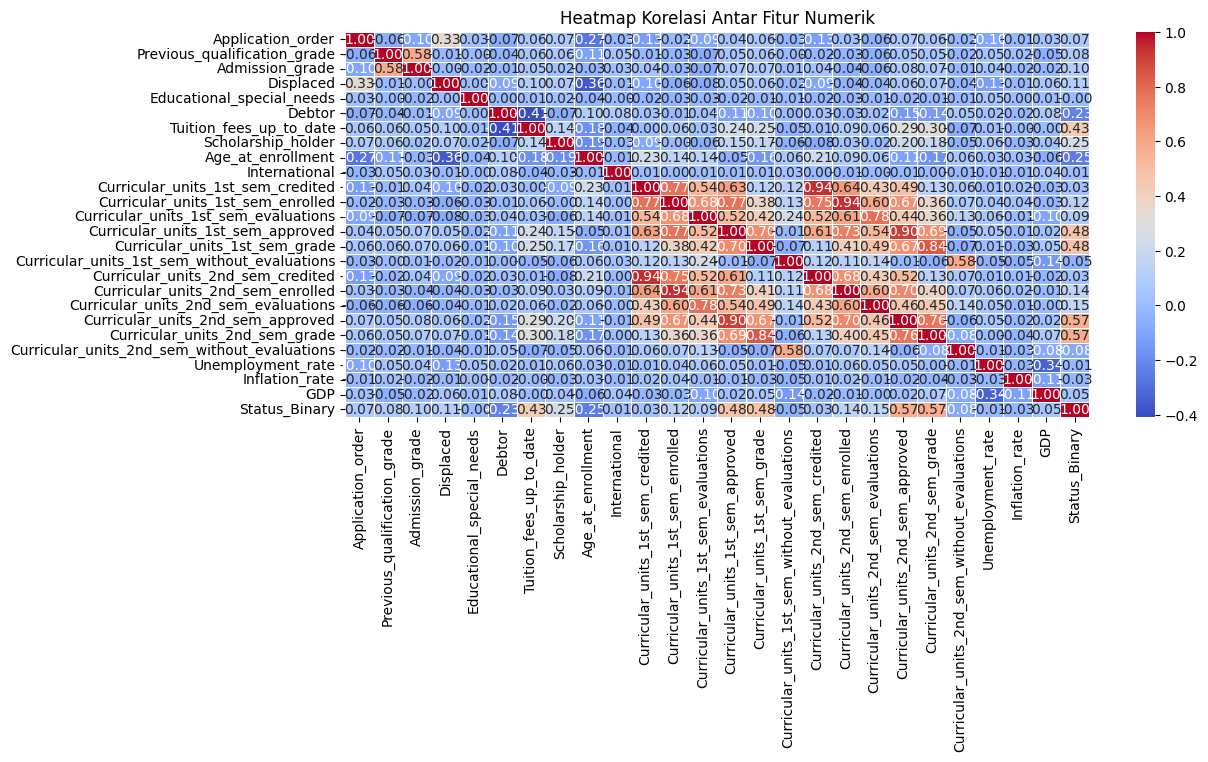

In [ ]:
numeric_features = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Headmap korelasi antar fitur numerik
plt.figure(figsize=(12, 5))
sns.heatmap(clean_df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

Heatmap khusus untuk kolom Attrition untuk mengetahui fitur numberik mana yang mempengaruhi

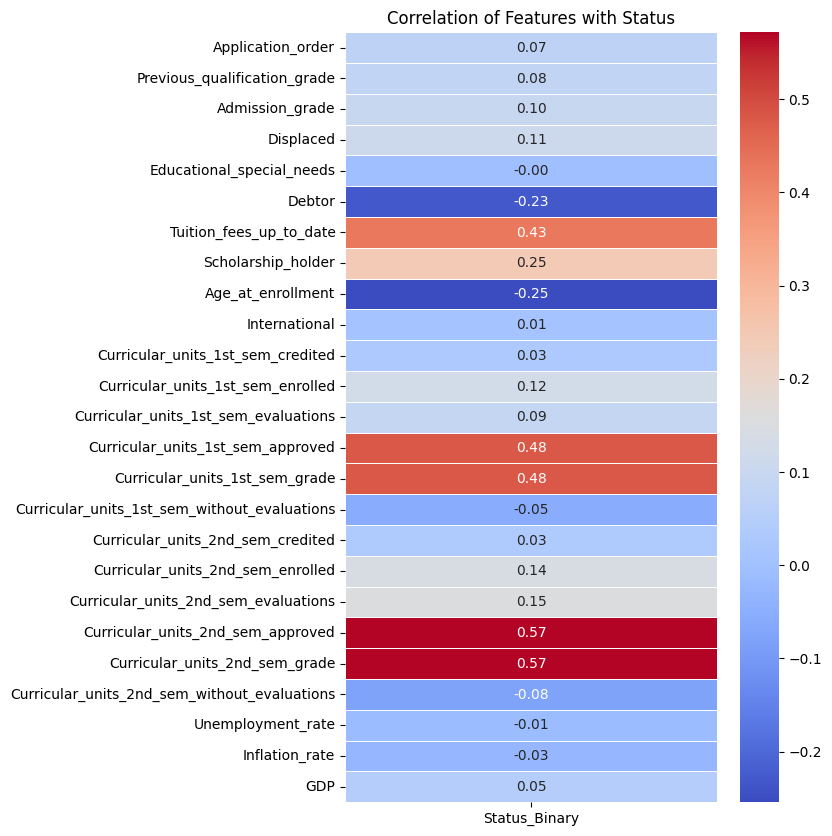

In [ ]:
# Ambil fitur numerik
# numerical_features = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix for the selected numeric features
correlation_matrix = clean_df[numeric_features].corr()

# Extract correlation of all features with 'Attrition'
status_corr = correlation_matrix[['Status_Binary']].drop('Status_Binary')
# attrition_corr = correlation_matrix[['Attrition']] # Keep Attrition if it's the only column

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(status_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Correlation of Features with Status')
plt.show()

Pengecekan khusus untuk kolom Attrition untuk mengetahui fitur category mana yang mempengaruhi dengan menggunakan F-staristic dan p-value

In [ ]:
categorical_features = clean_df.select_dtypes(include=['object']).columns.tolist()

anova_results = {}

for col in categorical_features:
    groups = [clean_df[clean_df[col] == val]['Status_Binary'].dropna() for val in clean_df[col].dropna().unique()]
    if len(groups) > 1:
        try:
            f_stat, p_val = f_oneway(*groups)
            anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}
        except Exception as e:
            anova_results[col] = {'error': str(e)}

anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')
print(anova_df)

                            F-statistic       p-value
Status                              inf  0.000000e+00
Application_mode              25.700513  4.490479e-78
Course                        19.912430  5.361612e-56
Gender                       191.982773  9.085401e-43
Previous_qualification        13.220443  3.133945e-35
Mothers_occupation             6.826798  5.470126e-28
Mothers_qualification          6.892464  6.738780e-26
Fathers_qualification          5.694284  5.372166e-23
Fathers_occupation             3.833691  2.040340e-16
Marital_status                12.034659  1.344794e-11
Daytime_evening_attendance    28.841687  8.257186e-08
Nacionality                    0.882681  6.101691e-01


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Menetapkan fitur penting numerical dan categorical dan menggabungkannya kedalam satu dataframe

In [ ]:
# Define important features based on analysis
important_categorical = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
important_numerical = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                       'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
                       'Debtor']

selected_features_df = clean_df[important_categorical + important_numerical + ['Status_Binary']]

In [ ]:
# Melampirkan data yang ada dalam fitur categorical
for col in important_categorical:
    print(selected_features_df[col].value_counts())

Application_mode
1st Phase - General Contingent                         1708
2nd Phase - General Contingent                          872
Over 23 Years Old                                       785
Change of Course                                        312
Technological Specialization Diploma Holders            213
Holders of Other Higher Courses                         139
3rd Phase - General Contingent                          124
Transfer                                                 77
Change of Institution/Course                             59
1st Phase - Special Contingent (Madeira Island)          38
Short Cycle Diploma Holders                              35
International Student (Bachelor)                         30
1st Phase - Special Contingent (Azores Island)           16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change of Institution/Course (International)              1
Ordinance No. 533-A/99,

### Encoding Categorical

In [ ]:
# Tentukan kolom kategorikal yang ingin di-encode
categorical_cols = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']

# Lakukan One-Hot Encoding
encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(selected_features_df[categorical_cols])
encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)

# Buat DataFrame hasil encoding
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols, index=selected_features_df.index)

# Gabungkan fitur numerik + hasil encoding + target
numerical_cols = selected_features_df.drop(columns=categorical_cols + ['Status_Binary']).columns
selected_features_df_final = pd.concat([
    selected_features_df[numerical_cols],
    encoded_df,
    selected_features_df['Status_Binary']
], axis=1)

### Outliers

Mengecek outliers dengan boxplot, namun terlihat bahwa dataset memang sudah minim outliers

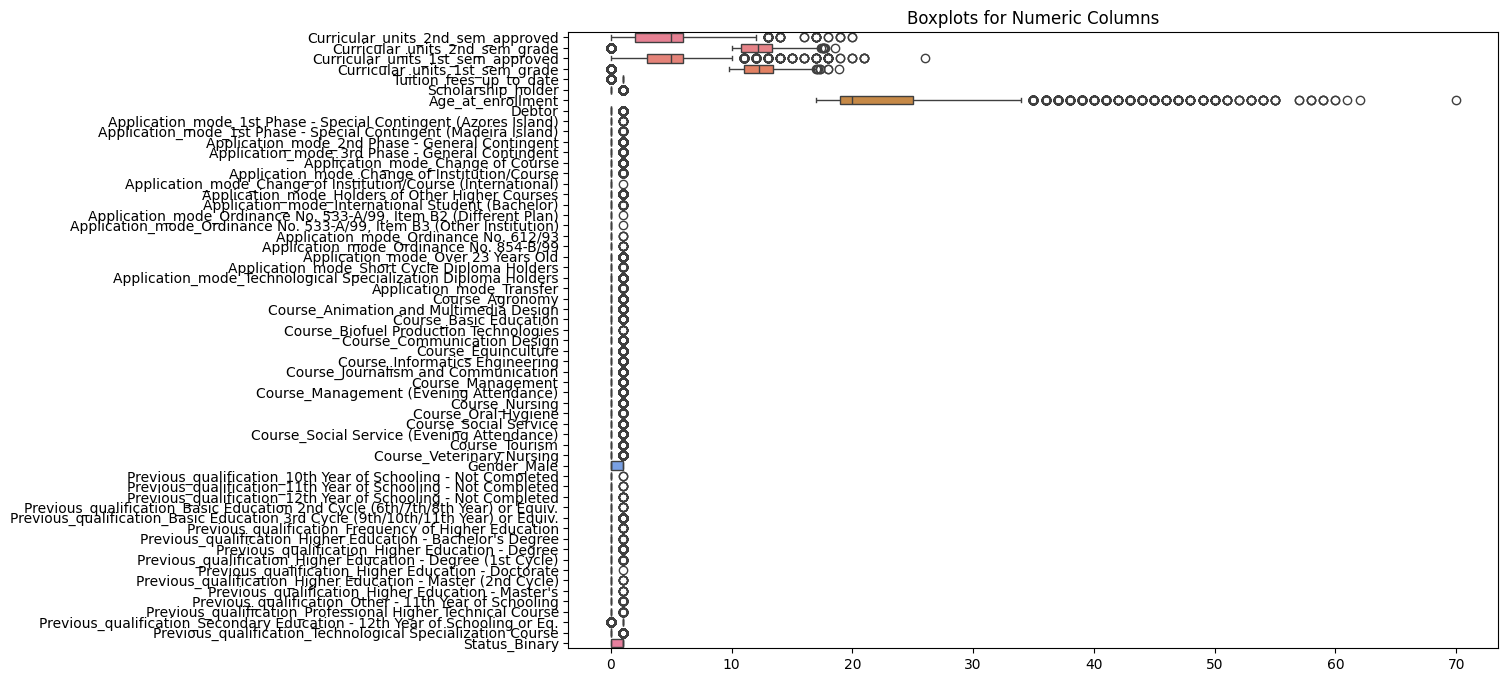

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_features_df_final.select_dtypes(include=np.number), orient='h')
plt.title("Boxplots for Numeric Columns")
plt.show()

## Exploratory Data Analysis (EDA)

In [ ]:
selected_features_df.describe(include='all')

,Application_mode,Course,Gender,Previous_qualification,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Status_Binary
count,4424,4424,4424,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
unique,18,17,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1st Phase - General Contingent,Nursing,Female,Secondary Education - 12th Year of Schooling o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1708,766,2868,3717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.435805,10.230206,4.706600,10.640822,0.880651,0.248418,23.265145,0.113698,0.678797
std,NaN,NaN,NaN,NaN,3.014764,5.210808,3.094238,4.843663,0.324235,0.432144,7.587816,0.317480,0.466991
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,10.750000,3.000000,11.000000,1.000000,0.000000,19.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,5.000000,12.200000,5.000000,12.285714,1.000000,0.000000,20.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,6.000000,13.333333,6.000000,13.400000,1.000000,0.000000,25.000000,0.000000,1.000000


In [ ]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_mode                   4424 non-null   object 
 1   Course                             4424 non-null   object 
 2   Gender                             4424 non-null   object 
 3   Previous_qualification             4424 non-null   object 
 4   Curricular_units_2nd_sem_approved  4424 non-null   int64  
 5   Curricular_units_2nd_sem_grade     4424 non-null   float64
 6   Curricular_units_1st_sem_approved  4424 non-null   int64  
 7   Curricular_units_1st_sem_grade     4424 non-null   float64
 8   Tuition_fees_up_to_date            4424 non-null   int64  
 9   Scholarship_holder                 4424 non-null   int64  
 10  Age_at_enrollment                  4424 non-null   int64  
 11  Debtor                             4424 non-null   int64

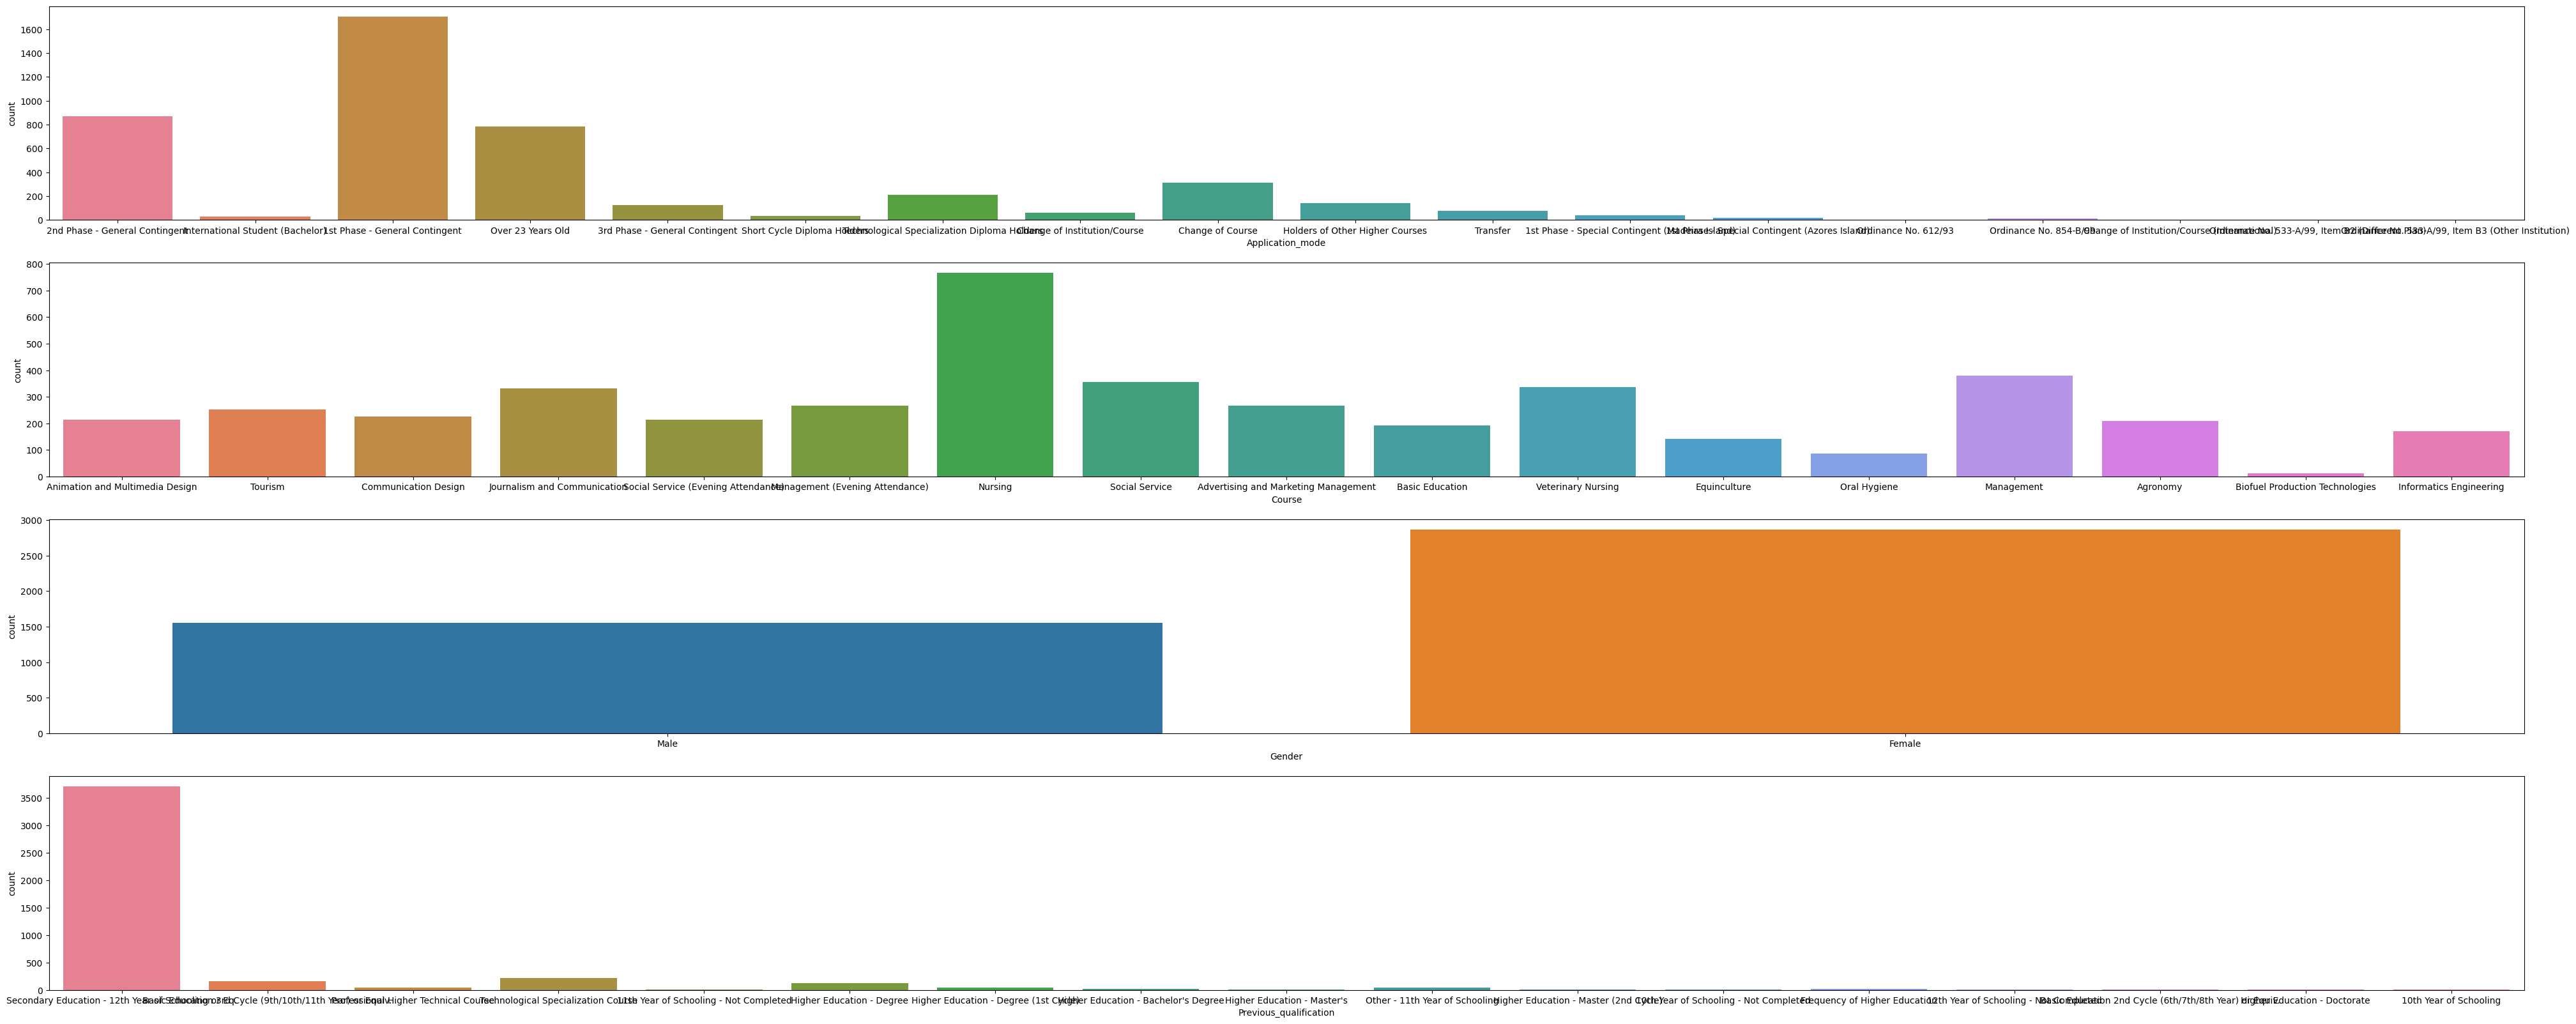

In [ ]:
# Menampilkan distribusi fitur categorical
categorical = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']

fig, ax = plt.subplots(len(categorical), 1,figsize=(50,20))
for i, feature in enumerate(categorical):
  sns.countplot(data=selected_features_df, x=feature, hue=feature, ax=ax[i])
plt.show()

In [ ]:
# Fungsi categorical_plot membuat serangkaian countplot untuk setiap fitur kategorikal yang diberikan
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,25))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

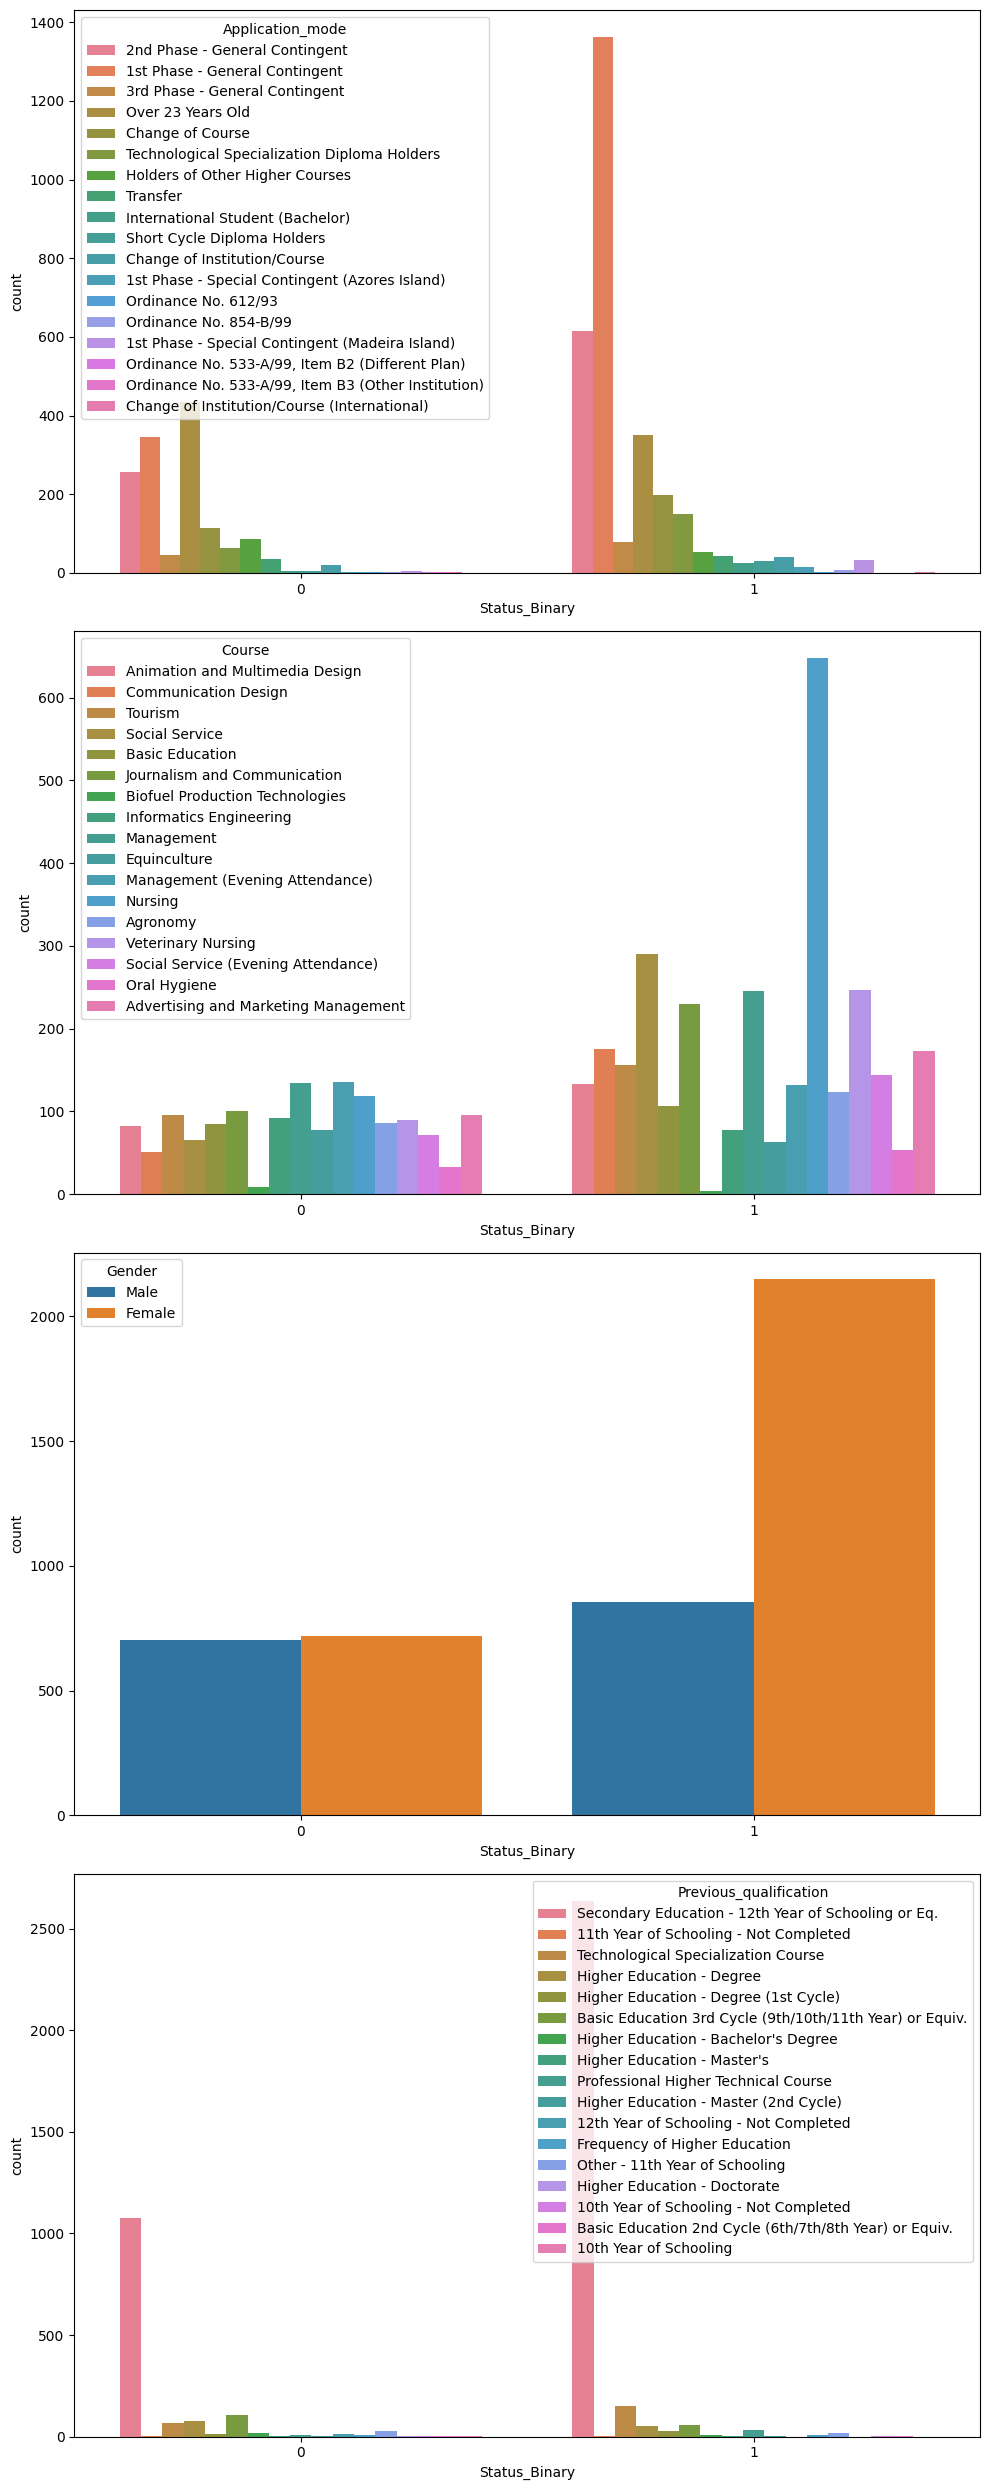

In [ ]:
categorical_plot(
    features=['Application_mode', 'Course', 'Gender', 'Previous_qualification'],
    df=selected_features_df,
    segment_feature="Status_Binary"
)

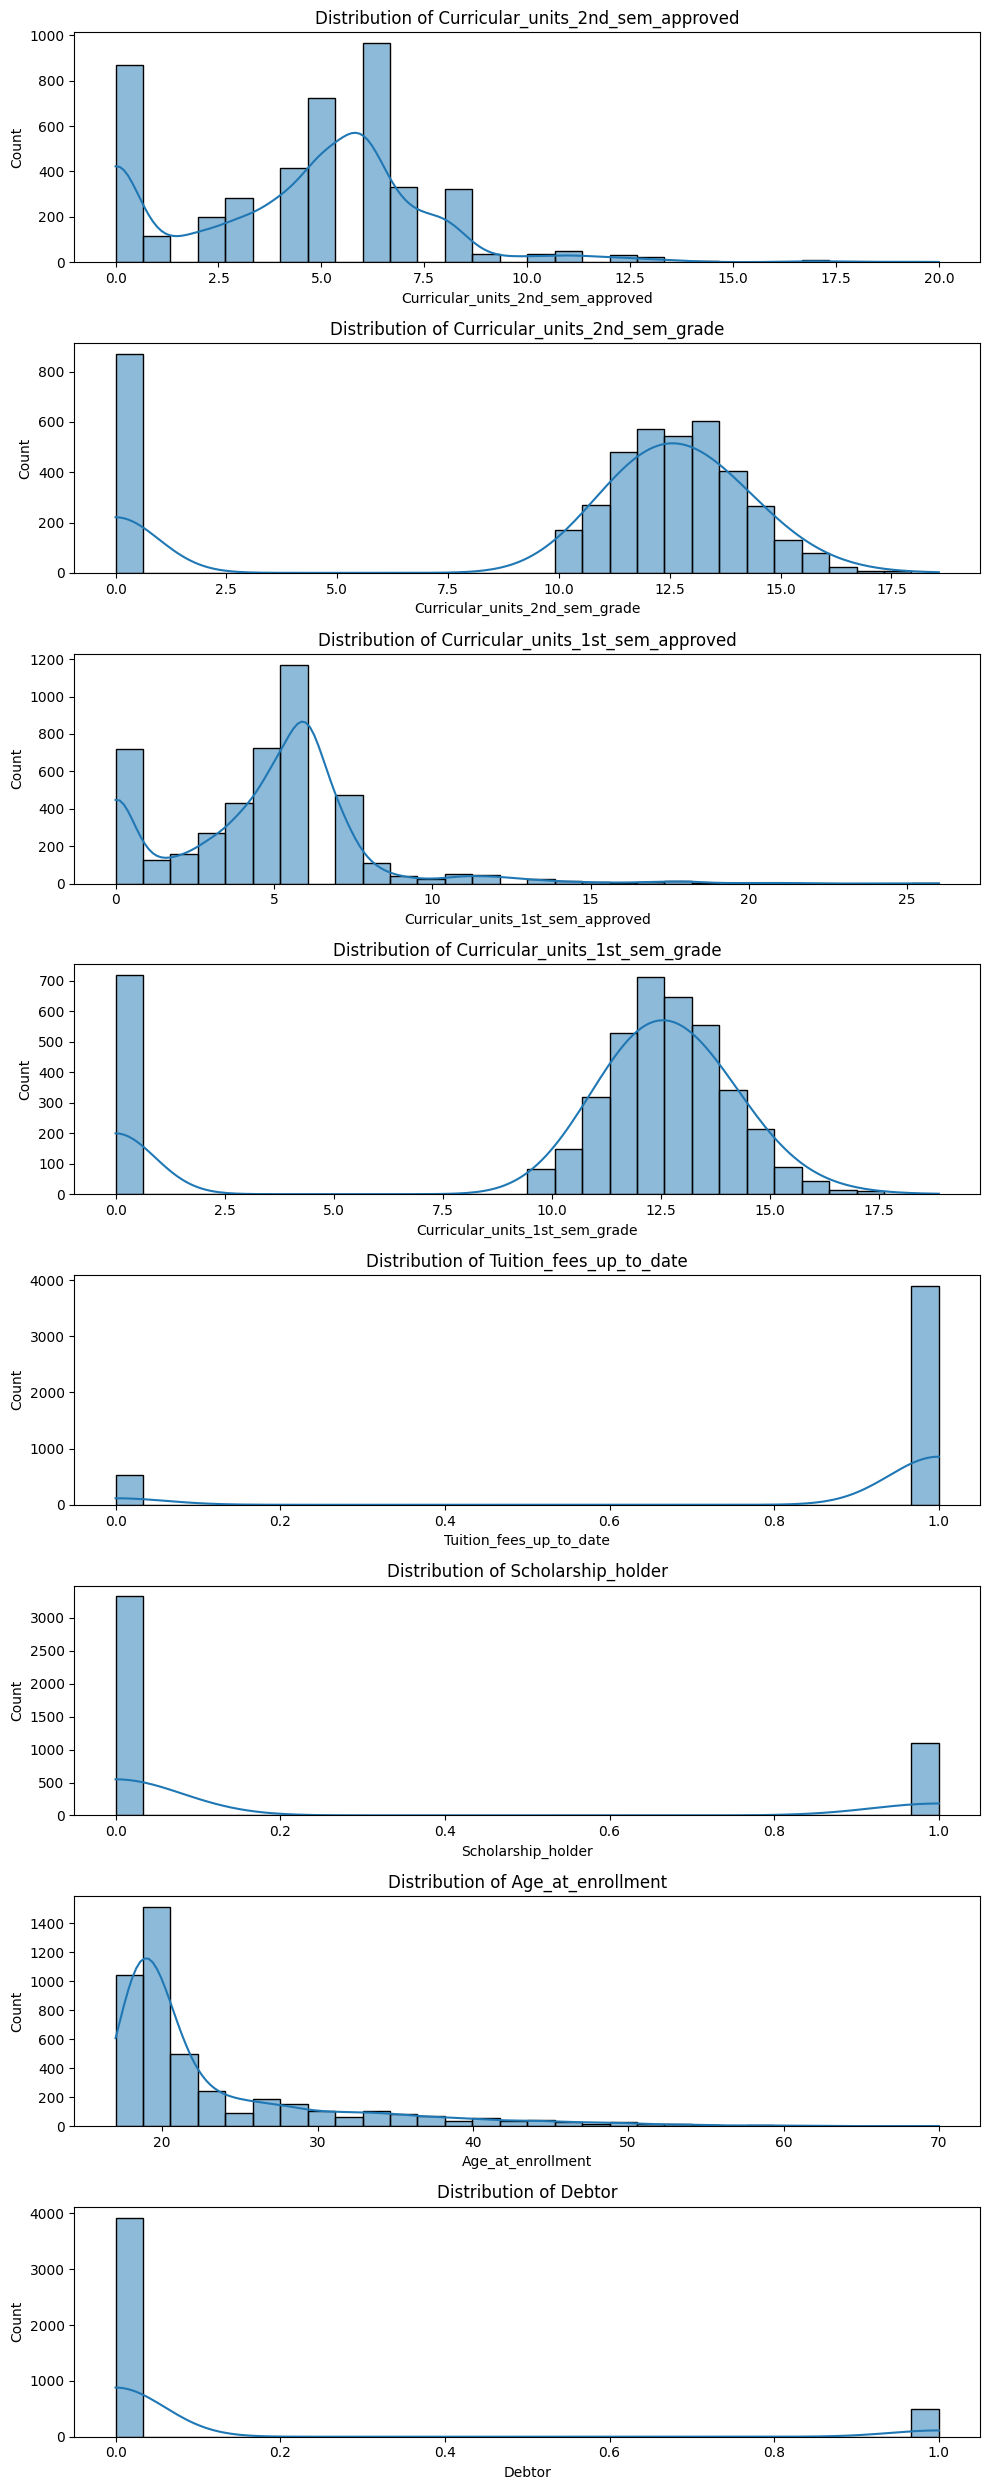

In [ ]:
# Menampilkan Distribusi fitur numberik
numerical = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Age_at_enrollment',
    'Debtor'
]

def plot_numeric_distribution(features, df):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 25))
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=ax[i], bins=30)
        ax[i].set_title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

plot_numeric_distribution(numerical, selected_features_df)

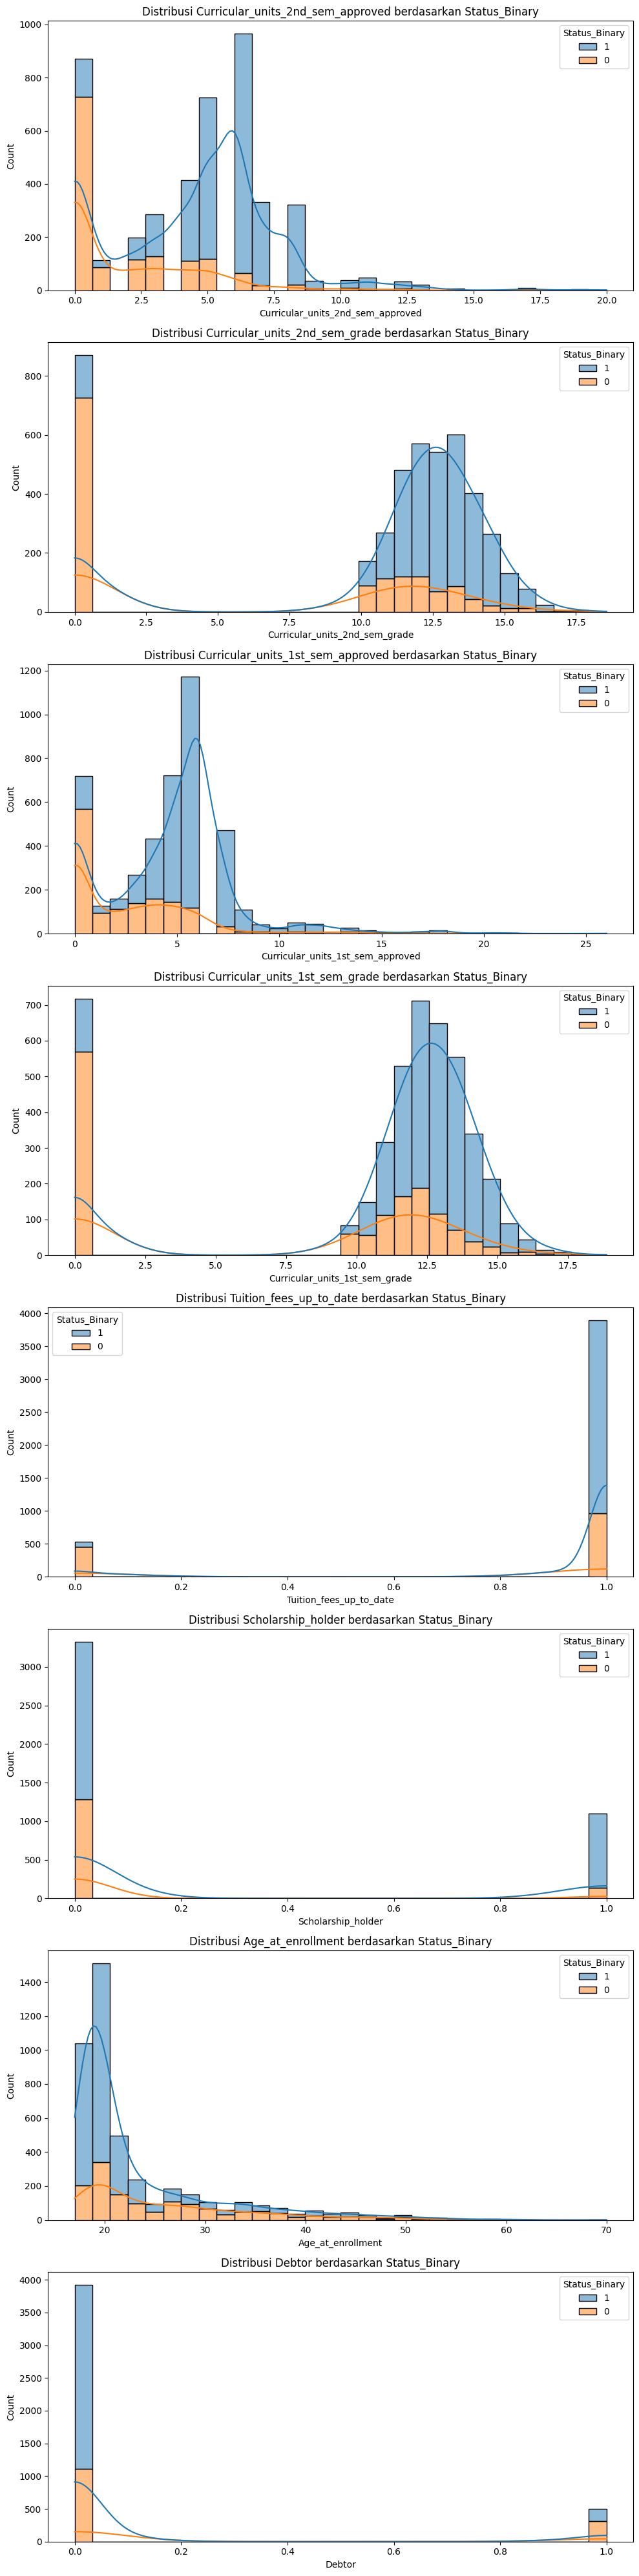

In [ ]:
# Menampilkan distribusi fitur numberik berdasarkan Status
def plot_numeric_distribution_by_status(features, df, label_col='Status_Binary'):
    fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)))
    if len(features) == 1:
        axes = [axes]  # agar iterable jika hanya satu fitur

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue=label_col, hue_order=[1, 0], kde=True, multiple='stack', ax=axes[i], bins=30)
        axes[i].set_title(f'Distribusi {feature} berdasarkan {label_col}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_numeric_distribution_by_status(numerical, selected_features_df)

## Modeling

### Oversampling Class Distribution

In [ ]:
X = pd.get_dummies(selected_features_df_final.drop('Status_Binary', axis=1), drop_first=True)
y = selected_features_df_final['Status_Binary']

In [ ]:
# Check class distribution
print("Class distribution in training set:")
print(y.value_counts(normalize=True))

Class distribution in training set:
Status_Binary
1    0.678797
0    0.321203
Name: proportion, dtype: float64


In [ ]:
# RandomOverSampler untuk menyamakan distribusi 1 dan 0
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Class distribution after oversampling:")
print(y_resampled.value_counts(normalize=True))

Class distribution after oversampling:
Status_Binary
0    0.5
1    0.5
Name: proportion, dtype: float64


### Split Dataset

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Scale numerical features
scaler = StandardScaler()
numerical_features = [col for col in X_resampled.columns if any(num_feat in col for num_feat in important_numerical)]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

### Hyperparameter tuning model dan training

In [ ]:
# Hyperparameter tuning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk model Random Forest
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    }
}

# Dictionary untuk menyimpan model terbaik
best_models = {}

print("🔧 Starting GridSearchCV...\n")

# Melakukan tuning dengan GridSearchCV
for name, cfg in param_grids.items():
    print(f"Tuning: {name}")

    grid_search = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best F1 Score (CV): {grid_search.best_score_:.4f}\n")

🔧 Starting GridSearchCV...

Tuning: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 Score (CV): 0.9074



In [ ]:
rf = RandomForestClassifier(
    n_estimators=150,
    # max_depth=0,
    min_samples_split=2,
    min_samples_leaf=1
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Results:
Accuracy: 0.9434
ROC AUC: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       601
           1       0.97      0.92      0.94       601

    accuracy                           0.94      1202
   macro avg       0.94      0.94      0.94      1202
weighted avg       0.94      0.94      0.94      1202



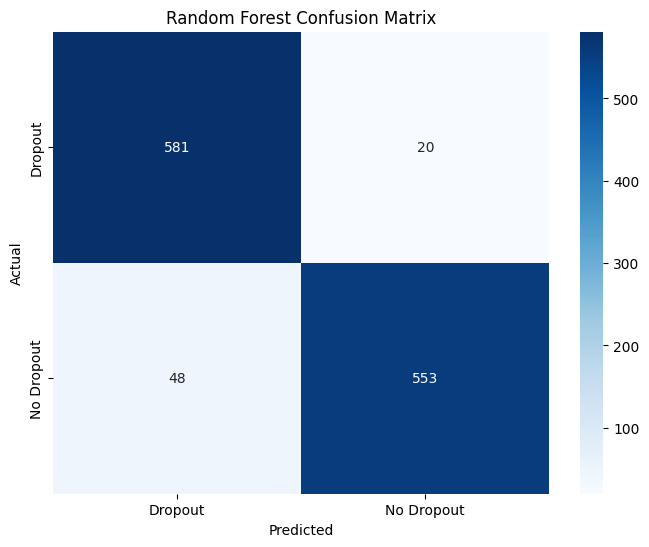

In [ ]:
# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'No Dropout'],
            yticklabels=['Dropout', 'No Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

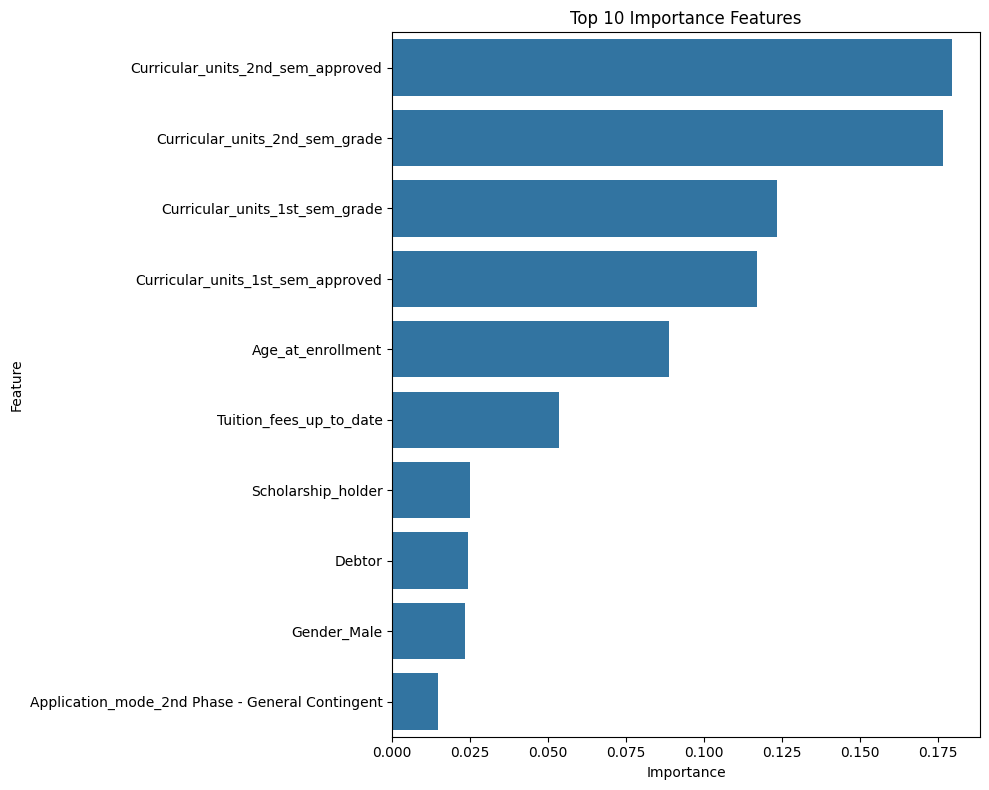

In [ ]:
# Menampilkan barplot Top 10 Importance Features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Importance Features')
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan peringkat importance features
rank_features = feature_importance.head(60)
print("Ranking by most important features:")
print(rank_features)

Ranking by most important features:
                                              Feature    Importance
0                   Curricular_units_2nd_sem_approved  1.795749e-01
1                      Curricular_units_2nd_sem_grade  1.766145e-01
3                      Curricular_units_1st_sem_grade  1.234046e-01
2                   Curricular_units_1st_sem_approved  1.170170e-01
6                                   Age_at_enrollment  8.865524e-02
4                             Tuition_fees_up_to_date  5.363573e-02
5                                  Scholarship_holder  2.486294e-02
7                                              Debtor  2.439476e-02
41                                        Gender_Male  2.346159e-02
10    Application_mode_2nd Phase - General Contingent  1.463213e-02
26             Course_Animation and Multimedia Design  1.316047e-02
21                 Application_mode_Over 23 Years Old  1.201831e-02
35                                     Course_Nursing  9.563660e-03
27          

In [ ]:
feature_importance.to_csv('importance_feature2.csv', index=False)

## Save Model

Save model dan endocer

In [ ]:
joblib.dump(rf, 'rf_model2.pkl')

['rf_model2.pkl']

In [ ]:
joblib.dump(encoder, 'onehot_encoder2.pkl')

['onehot_encoder2.pkl']

## Test Model

In [ ]:
# Menyiapkan dataframe untuk test model
predict_df = selected_features_df[selected_features_df['Status_Binary'] != 0]
predict_df

,Application_mode,Course,Gender,Previous_qualification,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Status_Binary
1,International Student (Bachelor),Tourism,Male,Secondary Education - 12th Year of Schooling o...,6,13.666667,6,14.000000,0,0,19,0,1
3,2nd Phase - General Contingent,Journalism and Communication,Female,Secondary Education - 12th Year of Schooling o...,5,12.400000,6,13.428571,1,0,20,0,1
4,Over 23 Years Old,Social Service (Evening Attendance),Female,Secondary Education - 12th Year of Schooling o...,6,13.000000,5,12.333333,1,0,45,0,1
5,Over 23 Years Old,Management (Evening Attendance),Male,Basic Education 3rd Cycle (9th/10th/11th Year)...,5,11.500000,5,11.857143,1,0,50,1,1
6,1st Phase - General Contingent,Nursing,Female,Secondary Education - 12th Year of Schooling o...,8,14.345000,7,13.300000,1,1,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1st Phase - General Contingent,Communication Design,Female,Secondary Education - 12th Year of Schooling o...,6,13.500000,6,13.833333,1,1,20,0,1
4418,Technological Specialization Diploma Holders,Communication Design,Male,Technological Specialization Course,7,13.142857,6,12.500000,1,0,20,0,1
4419,1st Phase - General Contingent,Journalism and Communication,Male,Secondary Education - 12th Year of Schooling o...,5,12.666667,5,13.600000,1,0,19,0,1
4422,1st Phase - General Contingent,Management,Female,Secondary Education - 12th Year of Schooling o...,5,12.000000,5,13.800000,1,1,20,0,1


In [ ]:
import pandas as pd
import pickle
import joblib

def encode_input(df, encoder, important_categorical, important_numerical):
    # Encode fitur kategorikal
    X_cat = encoder.transform(df[important_categorical])
    cat_cols = encoder.get_feature_names_out(important_categorical)

    # Fitur numerik
    X_num = df[important_numerical].reset_index(drop=True)

    # Gabungkan
    X_ready = pd.concat([X_num, pd.DataFrame(X_cat, columns=cat_cols, index=X_num.index)], axis=1)
    return X_ready

def predict_and_save():
    # === Load model & encoder ===
    with open("rf_model2.pkl", "rb") as file:
        model = joblib.load(file)

    encoder = joblib.load("onehot_encoder2.pkl")

    # === Load dataset tanpa kolom target ===
    df = predict_df

    if "Status_Binary" in df.columns:
        actual_status = df["Status_Binary"].copy()
        df = df.drop(columns=["Status_Binary"])
    else:
        actual_status = None

    important_categorical = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
    important_numerical = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                       'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
                       'Debtor']

    X_ready = encode_input(df, encoder, important_categorical, important_numerical)

    # === Predict ===
    prediction = model.predict(X_ready)
    proba = model.predict_proba(X_ready)

    # === Cetak salah satu hasil prediksi ===
    index = 2
    print("Hasil Prediksi untuk Baris ke-3:")
    print(df.iloc[index])

    if prediction[index] == 0:
        print(f"\nPrediksi: Mahasiswa akan keluar (Status = 0), kemungkinan keluar: {proba[index][0]:.2%}")
    else:
        print(f"\nPrediksi: Mahasiswa tidak akan keluar (Status = 1), kemungkinan: {proba[index][1]:.2%}")

    # === Simpan hasil ke dataframe ===
    df["Status (Actual)"] = actual_status if actual_status is not None else "-"
    df["PredictedStatus"] = prediction
    df["Probability"] = [round(p[0], 4) for p in proba]  # Probabilitas keluar (Status=0)

    # === Simpan hasil ke file baru ===
    df.to_csv("hasil_prediksi2.csv", index=False)
    print("\nHasil prediksi lengkap disimpan sebagai 'hasil_prediksi2.csv'")
    df.head()

if __name__ == "__main__":
    predict_and_save()

Hasil Prediksi untuk Baris ke-3:
Application_mode                                                     Over 23 Years Old
Course                                             Social Service (Evening Attendance)
Gender                                                                          Female
Previous_qualification               Secondary Education - 12th Year of Schooling o...
Curricular_units_2nd_sem_approved                                                    6
Curricular_units_2nd_sem_grade                                                    13.0
Curricular_units_1st_sem_approved                                                    5
Curricular_units_1st_sem_grade                                               12.333333
Tuition_fees_up_to_date                                                              1
Scholarship_holder                                                                   0
Age_at_enrollment                                                                   45
Debtor    

In [ ]:
pd.read_csv('hasil_prediksi2.csv')

,Application_mode,Course,Gender,Previous_qualification,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Status (Actual),PredictedStatus,Probability
0,International Student (Bachelor),Tourism,Male,Secondary Education - 12th Year of Schooling o...,6,13.666667,6,14.000000,0,0,19,0,1,1,0.2333
1,2nd Phase - General Contingent,Journalism and Communication,Female,Secondary Education - 12th Year of Schooling o...,5,12.400000,6,13.428571,1,0,20,0,1,1,0.2800
2,Over 23 Years Old,Social Service (Evening Attendance),Female,Secondary Education - 12th Year of Schooling o...,6,13.000000,5,12.333333,1,0,45,0,1,1,0.1800
3,Over 23 Years Old,Management (Evening Attendance),Male,Basic Education 3rd Cycle (9th/10th/11th Year)...,5,11.500000,5,11.857143,1,0,50,1,1,1,0.2333
4,1st Phase - General Contingent,Nursing,Female,Secondary Education - 12th Year of Schooling o...,8,14.345000,7,13.300000,1,1,18,0,1,1,0.2067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,1st Phase - General Contingent,Communication Design,Female,Secondary Education - 12th Year of Schooling o...,6,13.500000,6,13.833333,1,1,20,0,1,1,0.1867
2999,Technological Specialization Diploma Holders,Communication Design,Male,Technological Specialization Course,7,13.142857,6,12.500000,1,0,20,0,1,1,0.2733
3000,1st Phase - General Contingent,Journalism and Communication,Male,Secondary Education - 12th Year of Schooling o...,5,12.666667,5,13.600000,1,0,19,0,1,1,0.2467
3001,1st Phase - General Contingent,Management,Female,Secondary Education - 12th Year of Schooling o...,5,12.000000,5,13.800000,1,1,20,0,1,1,0.2067


simpan requirements.txt

In [ ]:
!pip freeze > requirements.txt